In [152]:
# IMPORTS

import pandas as pd
import requests
import seaborn as sn
import glob
import os
import matplotlib.pyplot as plt
import matplotlib


# # VISUALIZATION PARAMS

# # Set figure size
# sn.set(rc={'figure.figsize':(18,10)})

# # Set font size
# SMALL_SIZE = 15
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 25

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rcParams['legend.title_fontsize'] = MEDIUM_SIZE

# TITLE_FONT_SIZE = 25

In [153]:
# # GET DATA FROM NEOTOMA (R)

# # All run on this R server (on Binder): https://mybinder.org/v2/gh/NeotomaDB/Current_Workshop/main?urlpath=rstudio
# # See tutorial here: https://www.youtube.com/watch?v=kENPvbt9HoA

# devtools::install_github('NeotomaDB/neotoma2')
# library(neotoma2)
# install.packages("vegan")
# #pacman::p_load(neotoma2, dplyr, ggplot2, sf, geojsonsf, leaflet, terra, DT)


# # ### ALL NEOTOMA SEDIMENTARY POLLEN SITES IN ITALY (that overlap with 0-2k CE period) ###
# # Selle di Carnino
# # Colfiorito
# # Lago di Martignano
# # Lago Grande di Monticchio
# # Ospitale
# # Lago Padule
# # Rifugio Mondovi
# # Torbiera del Biecai
# # Laghi dell'Orgials
# # Lac de Villa
# # Lago di BÃ©vera
# # Lago di Ganna
# # Lago Pratignano
# # Lac du Verney-Dessus
# # Torveraz
# # Lac de Lod
# # TourbiÃ¨re de Santa Anna
# # TourbiÃ¨re de Pilaz
# # TourbiÃ¨re de Champlong
# # Ortasee
# # Ortasee
# # Trepalle Livigno
# # Lago Piccolo di Avigliana
# # Lago dell'Accesa
# # Rinderplatz
# # Dura-Moor
# # Schwarzsee
# # MalschÃ¶tscher Hotter
# # Ortasee
# # Dossaccio Bormio
# # Dossaccio Bormio
# # SommersÃ¼ss
# # Lago Grande di Avigliana
# # Lago Grande di Monticchio
# # Gorgo Basso
# # Biviere di Gela
# # Lago di Massaciuccoli
# # Lago dell'Accesa
# # Lago del Greppo
# # Pavullo nel Frignano
# # Lago di Venere
# # Lago Preola
# # Gorgo Basso
# # Lago del Segrino
# # Lago Grande di Monticchio
# # Sa Curcurica
# # Gorgo Pollicino
# # Marcato CixÃ©
# # Gorgo Lungo
# # Gorgo Tondo
# # Urgo Pietra Giordano
# # Urio Quattrocchi
# # Palughetto
# # Lago Lungo
# # Lago Trifoglietti
# # Colle Gnifetti
# # Lago Verdarolo
# # Lago Albano
# # Lago di Nemi
# # Lingua d'Oca
# # Lago di Massaciuccoli
# # Lago Lucone
# # Lago di Fimon
# # Lago di Baratz


# # EXPANSION OF INDIVIDUAL CODE TO LIST OF ALL ITALIAN SITES (credit ChatGPT) #
# #   using these sites' ids instead of names #


# # List of site IDs
# site_ids <- c(
#   335, 3064, 3276, 3295, 3330, 3337, 14474, 14480, 14485, 14513,
#   14529, 14536, 14548, 14551, 14593, 14594, 14596, 14598, 14600, 14606,
#   14606, 14612, 14613, 14644, 15689, 15690, 15691, 15693, 14606, 15698,
#   15698, 15701, 15702, 3295, 23928, 23933, 23938, 23939, 23952, 23953,
#   24034, 26121, 23928, 26643, 3295, 26995, 27012, 27013, 27014, 27016,
#   27017, 27018, 27026, 27565, 27569, 28025, 28094, 28117, 28121, 28124,
#   23938, 30465, 30466, 30468
# )


# # Function to process data for a single site ID
# process_site <- function(site_id) {
    
#   # Get data for the current site
#   current_site <- neotoma2::get_sites(siteid = site_id)
  
#   # Filter to pollen records only
#   current_site_pol <- current_site %>% neotoma2::filter(datasettype == "pollen")
  
#   # Download data
#   current_site_dl <- current_site_pol %>% get_downloads(all_data = TRUE)
  
#   # Get samples
#   current_site_samp <- samples(current_site_dl)
  
#   # Define ecological groups to remove from datasets
#   rmv_grps <- c("LABO", "CHAR", "UNID")
  
#   # Filter ecological groups
#   current_site_eco_grps <- unique(current_site_samp$ecologicalgroup)
#   current_site_eco_grps <- current_site_eco_grps[!current_site_eco_grps %in% rmv_grps]
  
#   # Get pollen counts
#   current_site_counts <- current_site_samp %>%
#     toWide(ecologicalgroup = current_site_eco_grps,
#            unit = c("NISP"),
#            elementtypes = c("pollen"),
#            groupby = "age",
#            operation = "sum")
  
#   # Ensure all counts are integers
#   current_site_counts <- apply(current_site_counts, FUN = as.integer, MARGIN = 2)
  
#   MIN_POLLEN_COUNT_PER_SAMP <- 500
  
#   # QUALITY CONTROL 1
#   # Remove all rows with low pollen counts
#   rowsum <- rowSums(current_site_counts[,-1])  # all but first col, which is 'age'
#   current_site_counts <- cbind(current_site_counts, data.frame(tot_pol_cnt = rowsum))
#   current_site_counts <- current_site_counts[current_site_counts$tot_pol_cnt > MIN_POLLEN_COUNT_PER_SAMP, ]
#   current_site_counts <- subset(current_site_counts, select = -c(tot_pol_cnt))
  
#   # Check if current_site_counts is empty; if so, return empty df (otherwise will cause error in lapply)
#   if (nrow(current_site_counts) == 0) {
#     # Return an empty data frame or list
#     return(data.frame())  # or return(list())
#   }
  
#   # QUALITY CONTROL 2
#   # Check if there are less than certain number of taxa (i.e. remove possibly taxa targeted analyses)
#   MIN_TOT_TAXA <- 100
#   if (ncol(current_site_counts) < MIN_TOT_TAXA) {
#     # Return an empty data frame or list
#     return(data.frame())  # or return(list())
#   }
  
  
#   # Rarefy
#   # Create df with no age (taxon cols only)
#   counts_no_age <- subset(current_site_counts, select = -c(age))
  
#   # Rarefy each and add rarefy col to counts df
#   #raremax <- min(rowSums(counts_no_age))
#   raremax <- MIN_POLLEN_COUNT_PER_SAMP  # to make all cores cross-comparable
#   Srare <- vegan::rarefy(counts_no_age, raremax)
#   current_site_final <- cbind(current_site_counts, data.frame(Srare))
  
#   # Add Shannon's diversity index and Pielou's evenness
#   shan <- vegan::diversity(counts_no_age)
#   even <- shan/log(vegan::specnumber(counts_no_age))
#   current_site_final <- cbind(current_site_final, data.frame(shan))
#   current_site_final <- cbind(current_site_final, data.frame(even))
    
#   # print rows, cols
#   print(dim(current_site_final))
  
#   # Return the processed data frame
#   return(current_site_final)
# }

# # Use lapply to apply the processing function to each site ID
# all_site_data <- lapply(site_ids, process_site)

# # Export processed data frames to CSV
# lapply(seq_along(all_site_data), function(i) {
#   write.csv(all_site_data[[i]], paste0(site_ids[i], "_rar_shan_even_csv"), row.names = FALSE)
# })




In [154]:
# NOTES

# In R, before rarefaction:

# Across all sites, only samples with min 500 pollen grain count (help ensure taxonomic coverage / comprehensiveness)

# IN PYTHON, after
# Across all sites, only sites with more than ___ taxa identified (helps filter taxa targeted studies)

# Only sites with at least ___ samples during the first millennium (for minimum coverage and resolution during period of interest)

# Make BIG assumption — that these pollen datasets, drawn from lakes selected for coring because of the their sedimentology not because they are comprehensive catchments, are representative of overall floristic in trends in these regions

# Overall Plant species richness (rar)

# Increasing: can be interpreted as a sign of agricultural diversification and expansion

# ...if we make an ssumption: med ecosystems acting like Bristish Isles and southeastern Germany ecosystems (rewilding means overall richness reduction)



# 22 Nov 2023

# Quality controls, in R
# minimum 500 taxa count per sample
# minimum 100 total taxa in pollen dataset
# These are arbitrary thresholds that attempts to ensure a minimum representability of the pollen dataset
# They attempt to avoid

# Note: Not ensure cross-site comparability -- that is, to ensure that the rar values of all sites 
#    could be compared w/ each other -- 500 was used as raremax (that is, the amount randomized samples to 
#    calculate rarefaction-based richness estimate)
# The downside: this means that the richness estimates are not direct respresentations of total plant taxa richness
# The upside: as noted, this makes absolute values of rar comparable across all sites; and this means one can aggregate
#   sites (by region, for example) in order to evaluate aggregate trends in specific geographies

In [155]:
###########
#
# GENERATE A SINGLE DATAFRAME WITH THE FOLLOWING STRUCTURE
# THAT CONTAINS ALL SITES
#
#         year  siteid      Srare
# 0      -729.0   14480  41.825985
# 1     -2790.0   14480  42.674906
# 2     -3730.0   14480  37.395648
# 3     -5328.0   14480  33.608190
# 4     -5931.0   14480  28.858754
#
##########

REMOVE_LIST = []


# Specify the folder path
folder_path = r'C:\Users\aspitzig\OneDrive - Ducks Unlimited Incorporated\Desktop\Other\HIST 2055 - Early Medieval History, Archaeology and Archaeoscience\Pollen_analysis\FINAL_Italy_sed_pollen_sites__rar_shan_even__min_500ct__min_100taxa__22_Nov_2023'

# Initialize an empty list to store DataFrames
dataframes_list = []

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path)]

# Iterate through each CSV file and read it into a DataFrame
for file_name in csv_files:
    
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file into a DataFrame
    dataframe = pd.read_csv(file_path)
    
    # get siteid from file name
    siteid = int(file_name.split('_', 1)[0])
    
    if not dataframe.empty and siteid not in REMOVE_LIST:
        
        # add year column
        dataframe['year'] = 1950 - dataframe['age']
        
        # Add siteid column
        dataframe['siteid'] = siteid
        
        # Append the DataFrame to the list
        dataframes_list.append(dataframe[['year', 'siteid', 'Srare']])

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(dataframes_list, ignore_index=True)

# Print the resulting DataFrame
print(result_df)

         year  siteid      Srare
0      -729.0   14480  41.825985
1     -2790.0   14480  42.674906
2     -3730.0   14480  37.395648
3     -5328.0   14480  33.608190
4     -5931.0   14480  28.858754
...       ...     ...        ...
2794 -25318.0    3295  27.965643
2795 -25321.0    3295  24.967741
2796 -76870.0    3295  34.974052
2797 -76871.0    3295  36.338788
2798 -76873.0    3295  36.601687

[2799 rows x 3 columns]


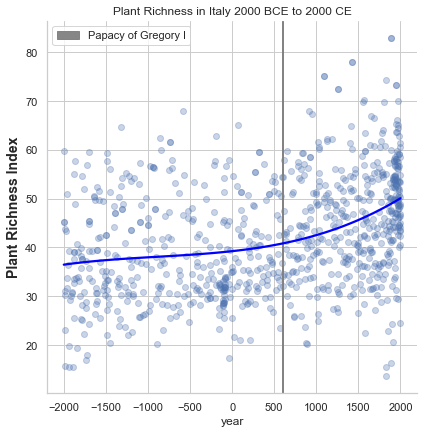

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only years between -2000 and 2000
filtered_df = result_df[(result_df['year'] >= -2000) & (result_df['year'] <= 2000)]

# Visualize the data with a scatter plot and polynomial best fit line
sns.lmplot(x='year', y='Srare', data=filtered_df, height=6, order=3, ci=None, line_kws={'color': 'blue'}, scatter_kws={'alpha': 0.3})

# Mark the period of the Papacy of Gregory I (590 to 604) with a labeled bar
plt.axvspan(590, 604, color='gray', alpha=0.95, label="Papacy of Gregory I")

# Add legend
plt.legend()

plt.title('Plant Richness in Italy 2000 BCE to 2000 CE')
plt.ylabel('Plant Richness Index', fontsize=14, fontweight='bold')
plt.show()


In [157]:
## ADD LAT and LON TO ALL SITES

import pandas as pd

# Read the additional CSV file
csv_file_path = r'C:\Users\aspitzig\OneDrive - Ducks Unlimited Incorporated\Desktop\Other\HIST 2055 - Early Medieval History, Archaeology and Archaeoscience\Pollen_analysis\all_sed_pollen_cores_in_italy_on_neotoma.csv'
additional_data_df = pd.read_csv(csv_file_path)

# Merge the DataFrames based on the 'siteid' column
result_df = pd.merge(result_df, additional_data_df[['siteid', 'latitude', 'longitude']], on='siteid', how='left')

# Print the resulting DataFrame
print(result_df)

         year  siteid      Srare   latitude  longitude
0      -729.0   14480  41.825985  44.185975   7.717165
1     -2790.0   14480  42.674906  44.185975   7.717165
2     -3730.0   14480  37.395648  44.185975   7.717165
3     -5328.0   14480  33.608190  44.185975   7.717165
4     -5931.0   14480  28.858754  44.185975   7.717165
...       ...     ...        ...        ...        ...
3727 -76871.0    3295  36.338788  40.931235  15.605185
3728 -76871.0    3295  36.338788  40.931235  15.605185
3729 -76873.0    3295  36.601687  40.931235  15.605185
3730 -76873.0    3295  36.601687  40.931235  15.605185
3731 -76873.0    3295  36.601687  40.931235  15.605185

[3732 rows x 5 columns]


In [158]:
# ASSIGN REGIONS TO SITES

# ..according to the following rules

# Assign the region "Northwest" to all sites with a longitude < 10.0 and a latitude > 44.0
# Assign the region "Northeast" to all sites with a longitude > 10.0 and a latitude > 45.0
# Assign the region "TuscEmRom" to all sites with a longitude > 10.0 and a latitude between 42.0 and 45.0
# Assign the region "Rome" to all sites with a longitude between 11.0 and 13.0 and a latitude between 41.0 and 42.0
# Assign the region "South" to all sites with a longitude > 15 and a latitude < 41.0
# Assign the region "Sicily" to all sites with a latitude < 39
# Assign the region "Sardinia" to all sites with a longitude < 10.0 and a latitude < 41.0

# Define a function to assign regions based on longitude and latitude
def assign_region(row):
    if row['longitude'] < 10.0 and row['latitude'] > 44.0:
        return 'Northwest'
    elif row['longitude'] > 10.0 and row['latitude'] > 45.0:
        return 'Northeast'
    elif 10.0 < row['longitude'] < 15.0 and 42.0 < row['latitude'] < 45.0:
        return 'TuscEmRom'
    elif 11.0 < row['longitude'] < 13.0 and 41.0 < row['latitude'] < 42.0:
        return 'Rome'
    elif row['longitude'] > 15.0 and row['latitude'] < 41.0:
        return 'South'
    elif row['latitude'] < 39:
        return 'Sicily'
    elif row['longitude'] < 10.0 and row['latitude'] < 41.0:
        return 'Sardinia'
    else:
        return 'Unknown'

# Apply the function to create the 'region' column
result_df['region'] = result_df.apply(assign_region, axis=1)

# Print the resulting DataFrame
print(result_df)

         year  siteid      Srare   latitude  longitude     region
0      -729.0   14480  41.825985  44.185975   7.717165  Northwest
1     -2790.0   14480  42.674906  44.185975   7.717165  Northwest
2     -3730.0   14480  37.395648  44.185975   7.717165  Northwest
3     -5328.0   14480  33.608190  44.185975   7.717165  Northwest
4     -5931.0   14480  28.858754  44.185975   7.717165  Northwest
...       ...     ...        ...        ...        ...        ...
3727 -76871.0    3295  36.338788  40.931235  15.605185      South
3728 -76871.0    3295  36.338788  40.931235  15.605185      South
3729 -76873.0    3295  36.601687  40.931235  15.605185      South
3730 -76873.0    3295  36.601687  40.931235  15.605185      South
3731 -76873.0    3295  36.601687  40.931235  15.605185      South

[3732 rows x 6 columns]


In [159]:
# MAP SITES, COLOR BY REGION

import folium
from IPython.display import display

# Create a map centered on Italy
italy_map = folium.Map(location=[41.8719, 12.5674], zoom_start=6, tiles='OpenStreetMap')

# Define a color mapping for each region
region_colors = {
    'Northwest': 'red',
    'Northeast': 'green',
    'TuscEmRom': 'purple',
    'Rome': 'orange',
    'South': 'brown',
    'Sicily': 'cyan',
    'Sardinia': 'pink',
    'Unknown': 'gray'
}

# Add circular markers for each site
for index, row in result_df.iterrows():
    popup_content = f"Site ID: {row['siteid']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}<br>Region: {row['region']}"
    
    # Get the color based on the region
    color = region_colors.get(row['region'], 'gray')
    
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.7,
                        popup=folium.Popup(popup_content, parse_html=True)).add_to(italy_map)

# Display the map inline in the Jupyter Notebook
display(italy_map)

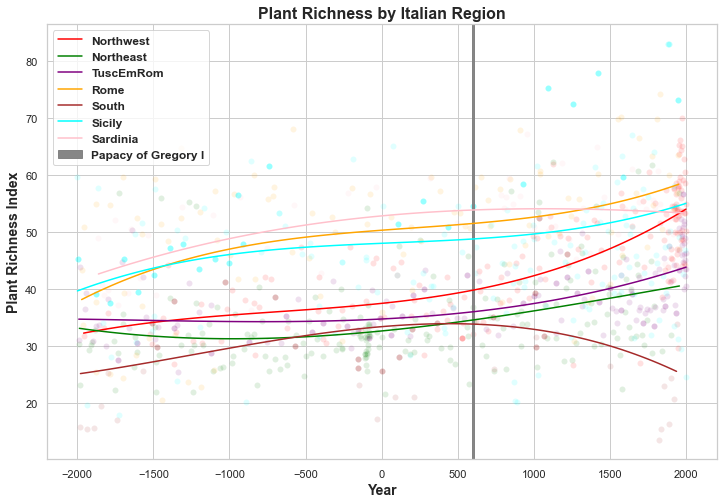

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define a color mapping for each region
region_colors = {
    'Northwest': 'red',
    'Northeast': 'green',
    'TuscEmRom': 'purple',
    'Rome': 'orange',
    'South': 'brown',
    'Sicily': 'cyan',
    'Sardinia': 'pink',
    'Unknown': 'gray'
}

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create an lmplot with non-linear trendlines for each region
for region, color in region_colors.items():
    region_data = result_df[(result_df['region'] == region) & (result_df['year'] > -2000) & (result_df['year'] < 2000)]
    
    # Check if region_data is not empty
    if not region_data.empty:
        # Fit a polynomial regression
        model = make_pipeline(PolynomialFeatures(3), LinearRegression())
        X = region_data['year'].values.reshape(-1, 1)
        y = region_data['Srare'].values
        model.fit(X, y)

        # Generate values for the line of best fit
        x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)
        y_values = model.predict(x_values)

        # Plot the scatter plot with 50% transparency
        sns.scatterplot(x='year', y='Srare', data=region_data, alpha=0.12, color=color)
        
        # Plot the non-linear trendline
        plt.plot(x_values, y_values, color=color, label=f'{region}')

# Mark the period of the Papacy of Gregory I (590 to 604) with a labeled bar
plt.axvspan(590, 604, color='gray', alpha=0.95, label="Papacy of Gregory I")

# Set the plot title and labels with larger and bolder fonts
plt.title('Plant Richness by Italian Region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Plant Richness Index', fontsize=14, fontweight='bold')

# Display the legend with larger and bolder fonts
plt.legend(prop={'size': 12, 'weight': 'bold'})

# Display the plots
plt.show()


In [161]:
### CONTINUE WITH ANALYSIS OF CROP TYPES ###   i.e. THE SECOND QUESTION

### CONSIDER MAKING A LIST OF ALL FOOD TAXA

# then calculate each cell value as a PERCENTAGE of the total sample pollen count
# then get the total percentage of food taxa together in each sample (what percentage of the total pollen count is from food plants?)
# soo...all food taxa as a PERCENTAGE of total pollen count for each sample
# then analyze trends in this value over time, by region

# goal: identify where and when agricultural expansion took place




In [173]:
# GET AND PROCESS FULL POLLEN DATASETS
# add lat, lon and region

import os
import pandas as pd

# Specify the folder path
folder_path = r'C:\Users\aspitzig\OneDrive - Ducks Unlimited Incorporated\Desktop\Other\HIST 2055 - Early Medieval History, Archaeology and Archaeoscience\Pollen_analysis\FINAL_Italy_sed_pollen_sites__rar_shan_even__min_500ct__min_100taxa__22_Nov_2023'

# Initialize an empty dictionary to store DataFrames
dataframes_dict = {}

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path)]

# Define a function to assign regions based on longitude and latitude
def assign_region(row):
    if row['longitude'] < 10.0 and row['latitude'] > 44.0:
        return 'Northwest'
    elif row['longitude'] > 10.0 and row['latitude'] > 45.0:
        return 'Northeast'
    elif 10.0 < row['longitude'] < 15.0 and 42.0 < row['latitude'] < 45.0:
        return 'TuscEmRom'
    elif 11.0 < row['longitude'] < 13.0 and 41.0 < row['latitude'] < 42.0:
        return 'Rome'
    elif row['longitude'] > 15.0 and row['latitude'] < 41.0:
        return 'South'
    elif row['latitude'] < 39:
        return 'Sicily'
    elif row['longitude'] < 10.0 and row['latitude'] < 41.0:
        return 'Sardinia'
    else:
        return 'Unknown'

# Iterate through each CSV file and read it into a DataFrame
for file_name in csv_files:
    
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file into a DataFrame
    dataframe = pd.read_csv(file_path)
    
    # get siteid from file name
    siteid = int(file_name.split('_', 1)[0])
    
    if not dataframe.empty:
        
        # add year column
        dataframe['year'] = 1950 - dataframe['age']
        
        # Add latitude, longitude, and region to the DataFrame
        site_info = additional_data_df[additional_data_df['siteid'] == siteid]
        if not site_info.empty:
            dataframe['latitude'] = site_info['latitude'].values[0]
            dataframe['longitude'] = site_info['longitude'].values[0]
            dataframe['region'] = assign_region(site_info.iloc[0])
        
        # Add the DataFrame to the dictionary with the file name as the key
        dataframes_dict[siteid] = dataframe


In [174]:
# ADD CROP TAXA PERCENTAGE

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import re

crop_taxa = ['pistacia', 'vitis', 'cannabis', 'triticum', 'secale', 'oleaceae', 'olea', 'linum usitatissimum', 
             'citrus', 'allium sativum', 'V. faba', 'Vicia cf. V. faba', 'Vicia faba', 'Ficus carica', 'morus alba']

exclude = ['Nerium oleander']    # false matches

for site, df in dataframes_dict.items():
    # Calculate 'tot_pol_cnt' (sum of all cells in each row except specified columns)
    df['tot_pol_cnt'] = df.drop(['year', 'Srare', 'age', 'shan', 'even'], axis=1).sum(axis=1)

    # Calculate 'tot_crop_pol_cnt' (sum of all cells in each row in columns containing crop_taxa)
    crop_columns = [col for col in df.columns if any(re.search(re.escape(taxon), col, re.IGNORECASE) for taxon in crop_taxa) and col not in exclude]
    df['tot_crop_pol_cnt'] = df[crop_columns].sum(axis=1)

    # Calculate 'crop_pct' (percentage of crop pollen count relative to total pollen count)
    df['crop_pct'] = df['tot_crop_pol_cnt'] / df['tot_pol_cnt']

    # Update the DataFrame in dataframes_dict
    dataframes_dict[site] = df



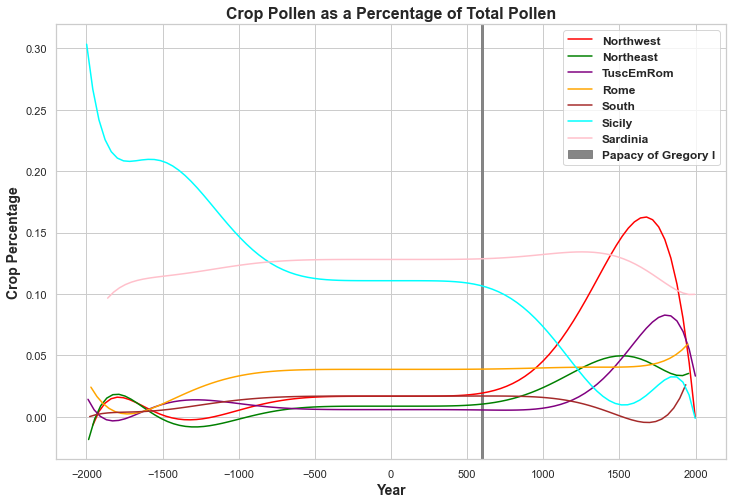

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define a color mapping for each region
region_colors = {
    'Northwest': 'red',
    'Northeast': 'green',
    'TuscEmRom': 'purple',
    'Rome': 'orange',
    'South': 'brown',
    'Sicily': 'cyan',
    'Sardinia': 'pink',
    'Unknown': 'gray'
}

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Group by region and create a non-linear trendline for each region
for region, color in region_colors.items():
    region_data_list = [df for site, df in dataframes_dict.items() if df['region'].iloc[0] == region]
    
    # Check if there is data for the region
    if region_data_list:
        # Concatenate DataFrames for the region
        region_data = pd.concat(region_data_list, ignore_index=True)
        
        # Check if the required columns are present
        if 'year' in region_data.columns and 'crop_pct' in region_data.columns:
            # Drop rows with NaN or infinity values and limit to -2000 < year < 2000
            region_data_cleaned = region_data.dropna(subset=['year', 'crop_pct']).replace([np.inf, -np.inf], np.nan).dropna(subset=['year', 'crop_pct'])
            region_data_cleaned = region_data_cleaned[(region_data_cleaned['year'] > -2000) & (region_data_cleaned['year'] < 2000)]
            
            if not region_data_cleaned.empty:
                # Fit a polynomial regression
                model = make_pipeline(PolynomialFeatures(9), LinearRegression())
                X = region_data_cleaned['year'].values.reshape(-1, 1)
                y = region_data_cleaned['crop_pct'].values
                model.fit(X, y)

                # Generate values for the line of best fit
                x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)
                y_values = model.predict(x_values)

                # Plot the non-linear trendline
                plt.plot(x_values, y_values, color=color, label=f'{region}')

# Mark the period of the Papacy of Gregory I (590 to 604) with a labeled bar
plt.axvspan(590, 604, color='gray', alpha=0.95, label="Papacy of Gregory I")

# Set the plot title and labels with larger and bolder fonts
plt.title('Crop Pollen as a Percentage of Total Pollen', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Crop Percentage', fontsize=14, fontweight='bold')

# Display the legend with larger and bolder fonts
plt.legend(prop={'size': 12, 'weight': 'bold'})

# Display the plots
plt.show()


In [187]:
# REDUCE COLS TO CROP TAXA ONLY
# AND CREATE A SINGLE DATAFRAME WITH ALL POLLEN SITES

# Note: use only taxa known to be directly associated with human agriculture

import pandas as pd
import re

crop_taxa = ['pistacia', 'vitis', 'cannabis', 'triticum', 'secale', 'oleaceae', 'olea', 'linum usitatissimum', 
             'citrus', 'allium sativum', 'V. faba', 'Vicia cf. V. faba', 'Vicia faba', 'Ficus carica', 'morus alba']

exclude = ['Nerium oleander']  # list false matches here

# Initialize an empty DataFrame to store the reduced data
reduced_df = pd.DataFrame()

# Iterate through each site in dataframes_dict
for siteid, df in dataframes_dict.items():
    # Check if the DataFrame is not empty
    if not df.empty:
        # Filter columns based on crop_taxa and exclude list
        selected_columns = ['year', 'region'] + [col for col in df.columns if any(re.search(re.escape(taxon), col, re.IGNORECASE) for taxon in crop_taxa) and all(ex not in col.lower() for ex in exclude)]
        
        # Extract relevant columns with a copy to avoid SettingWithCopyWarning
        site_data = df[selected_columns].copy()
        
        # Add the siteid column to the site data
        site_data['siteid'] = siteid
        
        # Replace NaN values with zeros
        site_data = site_data.fillna(0)
        
        # Convert all values except for 'region' to integers
        site_data.loc[:, site_data.columns != 'region'] = site_data.loc[:, site_data.columns != 'region'].applymap(int)
        
        # Append the site data to the reduced_df
        reduced_df = pd.concat([reduced_df, site_data], ignore_index=True)

# Display the resulting DataFrame
#print(reduced_df)


In [182]:
# FIND SIMILAR COLUMNS AND USE THESE TO CONSOLIDATE

import pandas as pd
from fuzzywuzzy import process

exclude_cols = ['year', 'region', 'siteid']

# Function to find similar column names using fuzzywuzzy
def find_similar_columns(df):
    columns = df.columns
    similar_columns = {}

    for col in columns:
        
        if col not in exclude_cols:
            
            # Use fuzzywuzzy's process function to find similar column names
            similar_cols = process.extract(col, columns, limit=len(columns) - 1)
            similar_cols = [sim_col[0] for sim_col in similar_cols if sim_col[1] >= 80]  # Adjust similarity threshold as needed

            # Add the column itself to the list
            similar_cols.append(col)
            similar_columns[col] = similar_cols

    return similar_columns

# Find similar columns
similar_columns = find_similar_columns(reduced_df)

print(similar_columns)


{'Oleaceae': ['Oleaceae', 'Olea', 'Oleaceae undiff.', 'Oleaceae'], 'Vitis': ['Vitis', 'Vitis'], 'Prunus': ['Prunus', 'Prunus-type', 'Prunus/Sorbus', 'cf. Prunus', 'Prunus spinosa', 'Prunus'], 'Secale': ['Secale', 'Secale-type', 'Secale cereale', 'Secale'], 'Olea': ['Olea', 'Oleaceae', 'Olea europaea', 'Nerium oleander', 'Oleaceae undiff.', 'cf. Olea', 'Olea'], 'Pistacia': ['Pistacia', 'Pistacia lentiscus', 'Pistacia'], 'Cannabis sativa': ['Cannabis sativa', 'Cannabis', 'Cannabis sativa'], 'Prunus-type': ['Prunus-type', 'Prunus', 'Humulus/Cannabis-type', 'Linum usitatissimum-type', 'Prunus-type'], 'Humulus/Cannabis': ['Humulus/Cannabis', 'Humulus/Cannabis-type', 'Cannabis', 'Humulus/Cannabis'], 'Secale-type': ['Secale-type', 'Secale', 'Humulus/Cannabis-type', 'Linum usitatissimum-type', 'Secale-type'], 'Secale cereale': ['Secale cereale', 'Secale', 'Secale cereale'], 'Olea europaea': ['Olea europaea', 'Olea', 'cf. Olea', 'Olea europaea'], 'Humulus/Cannabis-type': ['Humulus/Cannabis-type

In [185]:
# HAND SELECT CROP TAXA NAME CONSOLIDATIONS THAT MAKE SENSE

# AND ADD THESE AS NEW COLUMNS, THEN SUM THE POLLEN COUNTS FOR EACH

# NOTE: I add the suffix '_all'

crop_taxa_grps = {
 'Vitis_all': ['Vitis', 'Vitis'], 
 'Citrus_all': ['Citrus', 'Citrus'],
 'Ficus carica_all': ['Ficus carica', 'Ficus carica'],
 'Secale_all': ['Secale', 'Secale-type', 'Secale cereale', 'Secale'], 
 'Olea_all': ['Olea', 'Oleaceae', 'Olea europaea', 'Oleaceae undiff.', 'cf. Olea', 'Olea'],  # consider reducing to only europaea
 'Pistacia_all': ['Pistacia', 'Pistacia lentiscus', 'Pistacia'],
 'Cannabis_all': ['Cannabis', 'Cannabis sativa', 'Humulus/Cannabis', 'Humulus/Cannabis-type', 'Cannabis-type', 'Cannabis'],
 'Linum_usitatissimum_all': ['Linum usitatissimum', 'Linum usitatissimum-type', 'Linum usitatissimum'],
 'Triticum_all': ['Triticum', 'Avena/Triticum group', 'Triticum'],
 'Morus_alba_all': ['Morus alba', 'Morus alba-type', 'Morus alba'],
 'Vicia_faba_all': ['Vicia cf. V. faba', 'Vicia cf. V. faba']
}

# Add columns to reduced_df for each key in crop_taxa_grps and fill with the sum of corresponding columns
for key, value in crop_taxa_grps.items():
    reduced_df[key] = reduced_df[value].sum(axis=1)

# Add a new column 'crop_total' that is the sum of columns in crop_taxa_grps.keys()
reduced_df['crop_total'] = reduced_df[list(crop_taxa_grps.keys())].sum(axis=1)

# Add a new column 'century' that is the closest even century to the 'year'
reduced_df['century'] = (reduced_df['year'] // 100) * 100

# Select the desired columns from reduced_df
selected_columns = list(crop_taxa_grps.keys()) + ['year', 'region', 'crop_total', 'century']
reduced_df_filtered = reduced_df[selected_columns]

# Display the resulting DataFrame



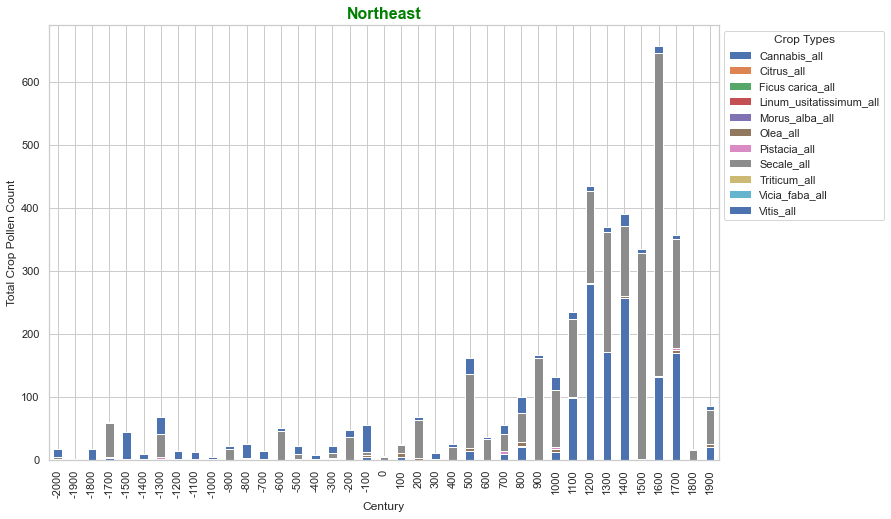

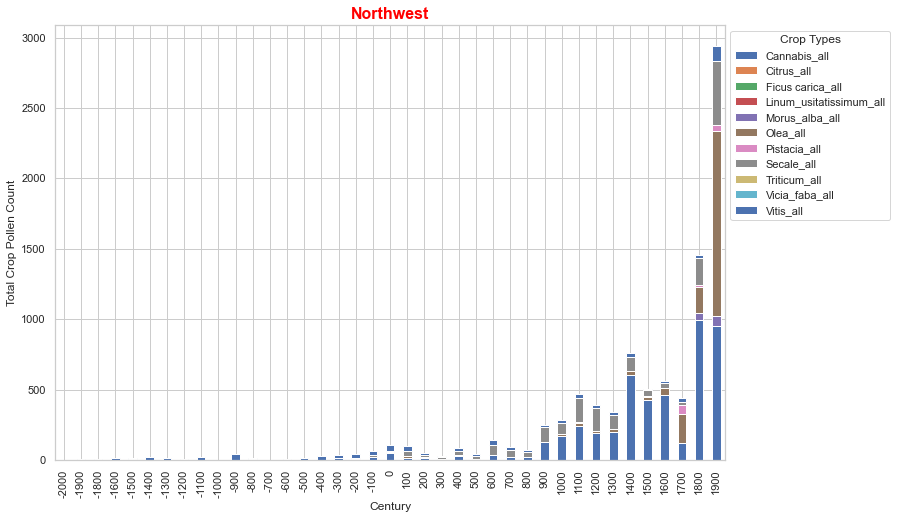

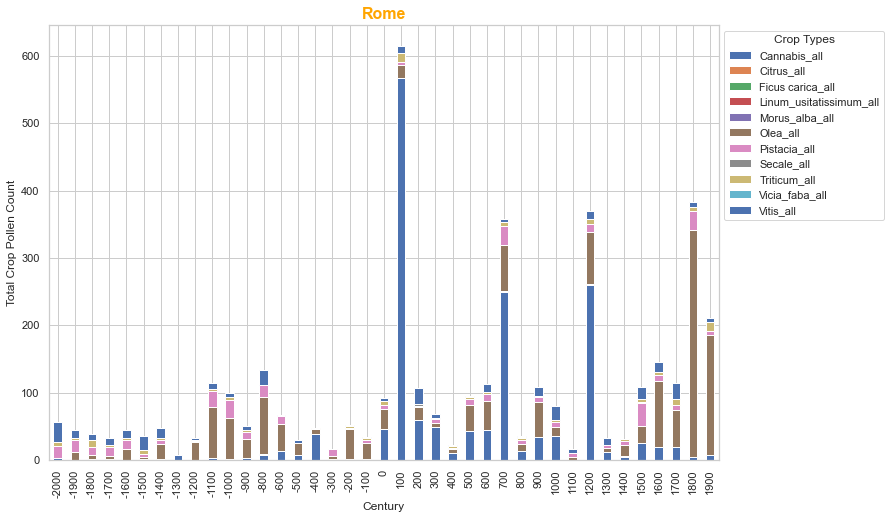

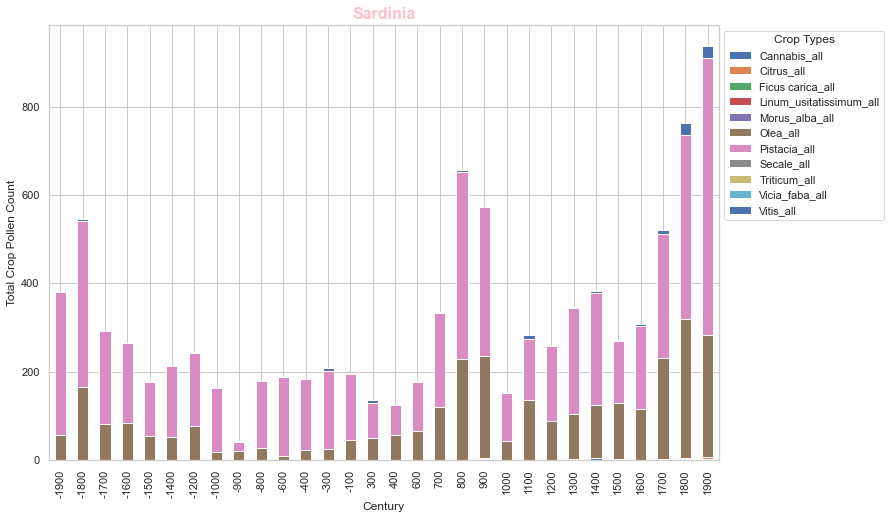

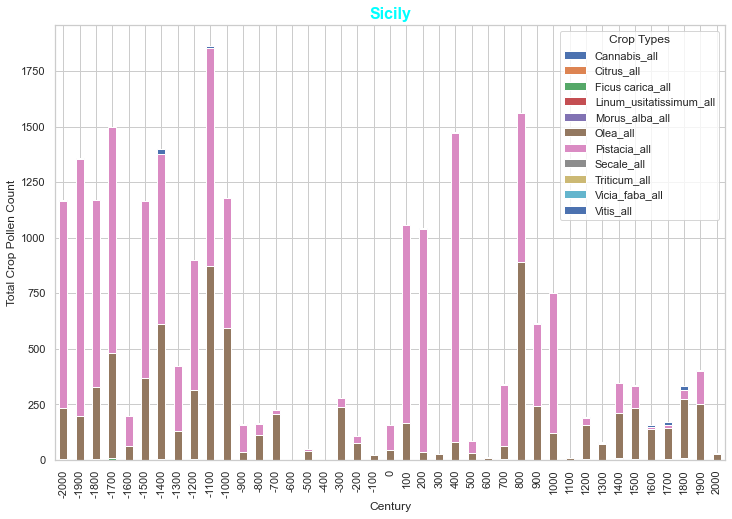

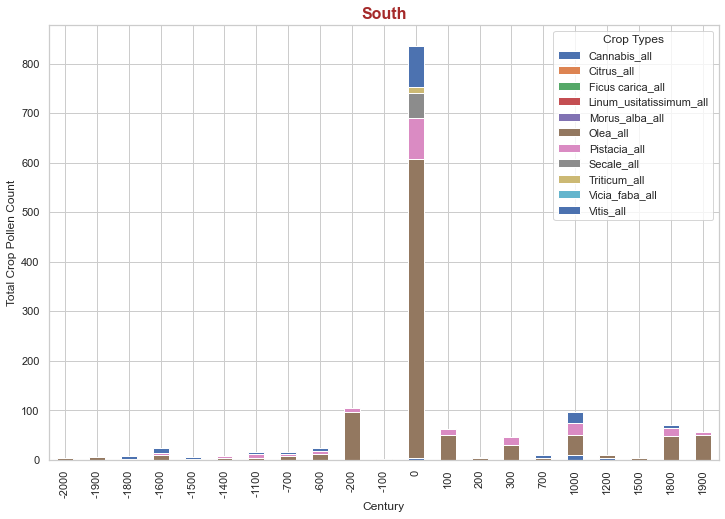

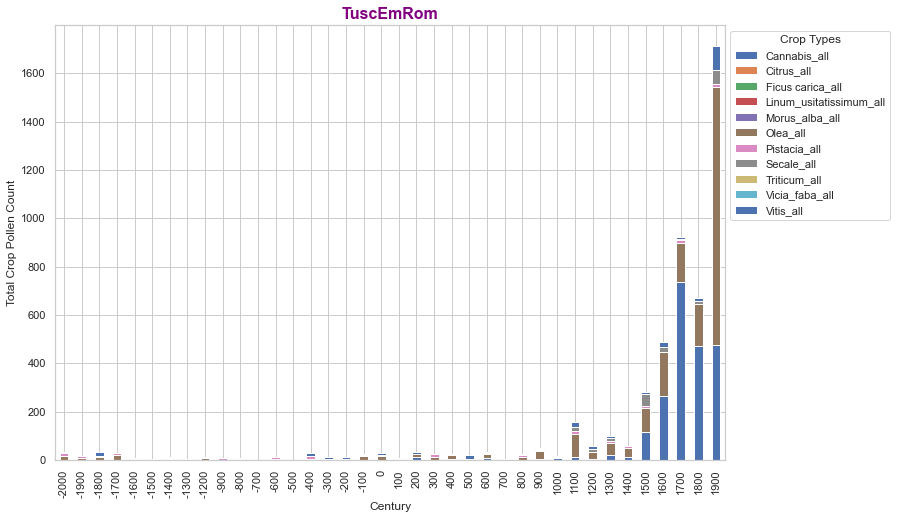

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color mapping for each region
region_colors = {
    'Northwest': 'red',
    'Northeast': 'green',
    'TuscEmRom': 'purple',
    'Rome': 'orange',
    'South': 'brown',
    'Sicily': 'cyan',
    'Sardinia': 'pink',
    'Unknown': 'gray'
}

# Iterate through each region in reduced_df_filtered
for region, region_data in reduced_df_filtered.groupby('region'):
    # Filter data for years -2000 to 2000
    region_data_filtered = region_data[(region_data['year'] >= -2000) & (region_data['year'] <= 2000)]
    
    # Create a new figure and axis for each region
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Pivot the filtered region_data to get a table suitable for stacked bar chart
    pivot_table = region_data_filtered.pivot_table(index='century', values=list(crop_taxa_grps.keys()), aggfunc='sum', fill_value=0)
    
    # Create a stacked bar chart for the region
    pivot_table.plot(kind='bar', stacked=True, ax=ax)
    
    # Set labels and title with the name of the region in all caps and the appropriate color
    region_color = region_colors.get(region, 'gray')
    ax.set_xlabel('Century')
    ax.set_ylabel('Total Crop Pollen Count')
    ax.set_title(f'{region}', color=region_color, fontsize=16, fontweight='bold')  # Adjust fontsize and fontweight
    
    # Display legend
    ax.legend(title='Crop Types', bbox_to_anchor=(1, 1))
    
    # Show the plot
    plt.show()



